In [77]:
import numpy as np
import matplotlib.pyplot as plt
from intfeat import StrumLiouvilleBasis
import math

# KT Smoothing

In [90]:
max_val = 1000

In [91]:
def kt_smoothed_histogram(data, max_val, prior=0.5):
    data = np.clip(data, 0, max_val - 1)  # chop-off the tail
    raw_counts = np.bincount(data, minlength=max_val)  # compute raw counts
    return (raw_counts + prior) / (np.size(data) + prior * max_val)

In [92]:
weights = 1 / (1 + np.arange(1000))
numbers = np.random.choice(1000, size=100000, p=weights/np.sum(weights))

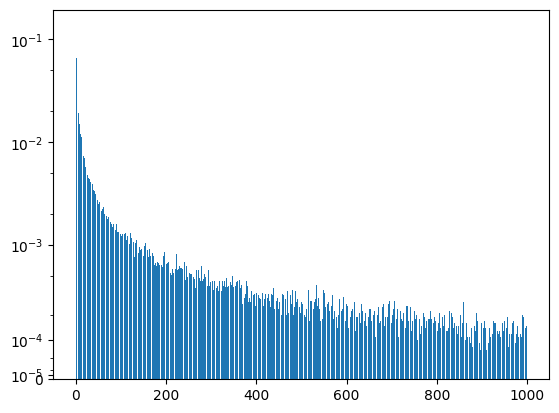

In [93]:
raw_histogram = np.bincount(numbers, minlength=1000) / len(numbers)
plt.bar(np.arange(1000), raw_histogram)
plt.yscale('asinh', linear_width=1e-4)

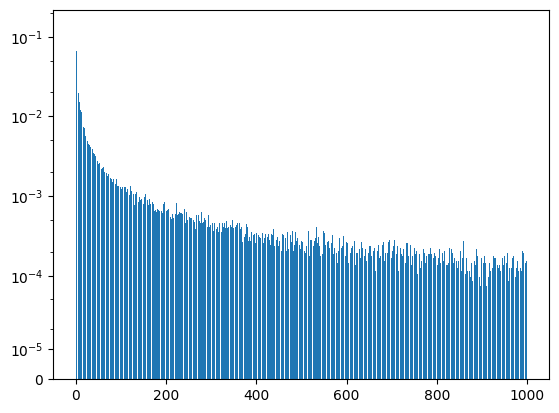

In [94]:
kt_hist = kt_smoothed_histogram(numbers, max_val=1000)
plt.bar(np.arange(1000), kt_hist)
plt.yscale('asinh', linear_width=1e-5)

In [95]:
np.min(kt_hist)

np.float64(6.467661691542288e-05)

# SL basis from KT weights

In [107]:
num_func = 12
basis = StrumLiouvilleBasis(max_val=max_val, num_funcs=num_func, weight_config=kt_hist, curvature_config=0.5)

In [108]:
xs = np.arange(max_val)
vecs = basis(xs)

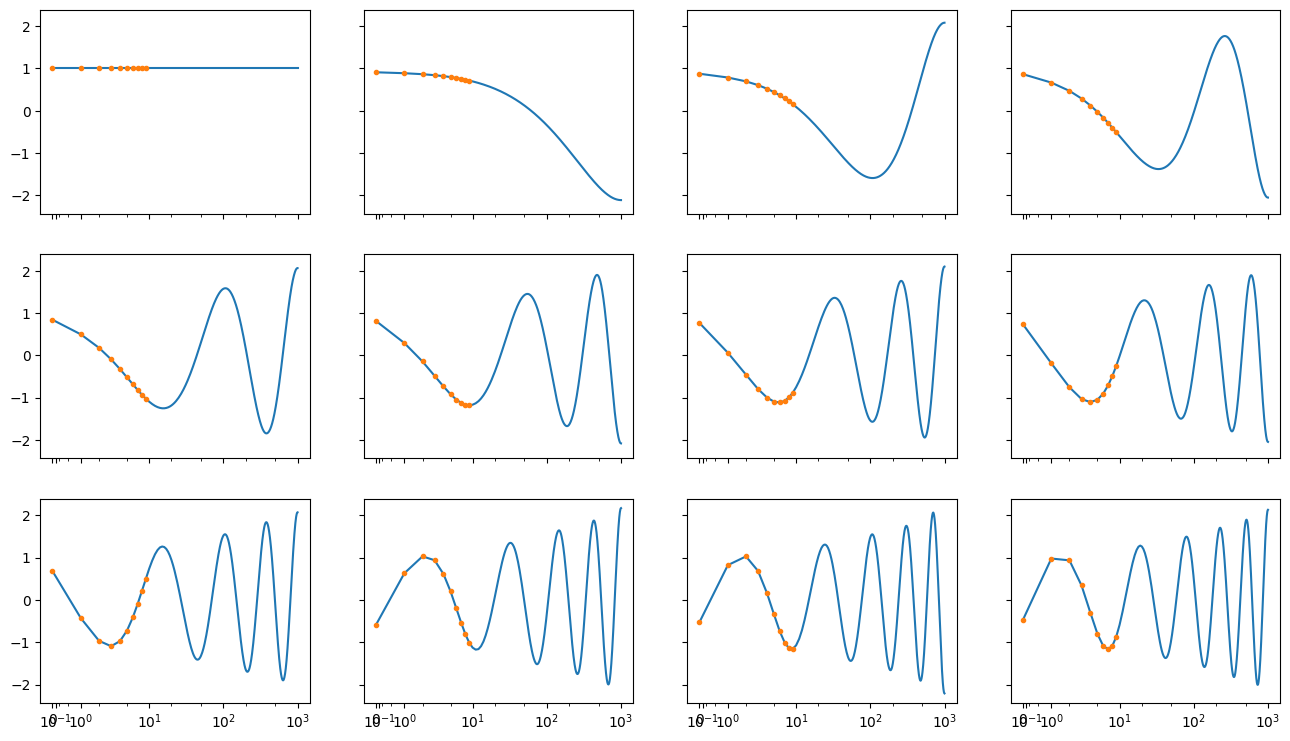

In [109]:
rows = math.floor(math.sqrt(num_func))
cols = math.ceil(num_func / rows)
fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows), sharex=True, sharey=True)
for i in range(num_func):
    ax = axs[i // cols, i % cols]
    ax.plot(xs, vecs[:, i])
    ax.plot(xs[:10], vecs[:10, i], marker='o', markersize=3, linestyle='None')
    ax.set_xscale('asinh')
plt.show()